<a href="https://colab.research.google.com/github/YisakJeong/-algorithm_team5/blob/main/Problem5_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install matplotlib

정렬되지 않은 숫자 리스트: 
 [394858, 3526, 192948, 440485, 144329, 473563, 69513, 430966, 487429]
기본 내장 함수로 정렬: 
 [753, 763, 1217, 2381, 3150, 3526, 4719, 4802, 5526, 7213] 
 병합정렬: 
 [753, 763, 1217, 2381, 3150, 3526, 4719, 4802, 5526, 7213] 
 퀵정렬: 
 [753, 763, 1217, 2381, 3150, 3526, 4719, 4802, 5526, 7213]

정렬된 리스트가 동일합니다.


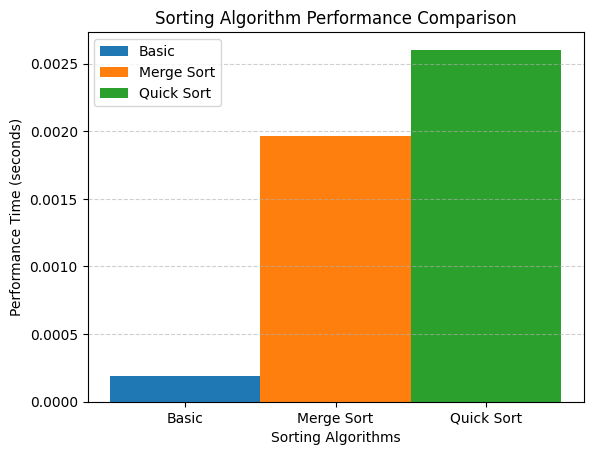

In [7]:
# 파일을 읽고 df로 저장
import pandas as pd
import random
import time
import matplotlib.pyplot as plt  # 터미널에서 pip install matplotlib으로 설치 필요
# import numpy as np

#numbers = pd.read_csv("numbers.csv") # 파일명 변환 필요
#numbers = df['values'].tolist() # 리스트화가 되어있지 않을 경우
numbers = [random.randint(0, 10**6) for _ in range(10**3)]
print(f"정렬되지 않은 숫자 리스트: \n {numbers[1:10]}")

# sort() 사용 - 내장 정렬 함수
basic_sorted = sorted(numbers)

# 병합 정렬 (Merge Sort)
def merge_sort(arr):
    #기본 조건: 리스트 길이가 1 이하이면 그대로 반환(정렬할 필요 없음)
    if len(arr) <= 1:
        return arr

    # 중간 인덱스를 배열을 반으로 나눔
    mid = len(arr) // 2

    # 왼쪽 절반을 재귀적으로 정렬
    left = merge_sort(arr[:mid])

    # 오른쪽 절반을 재귀적으로 정렬
    right = merge_sort(arr[mid:])

    #두 개의 정렬된 리스트를 병합하는 함수 호출후 반환
    return merge(left, right)

# 두 개의 정렬된 리스트를 병합하는 함수
def merge(left, right):
    result = [] # 병합된 결과를 저장할 리스트
    i = j = 0 # 각 기스트의  연재 배고 위치를 나타내는 인덱스

    # 두 리스트를 비교하며 작은 값부터 결과 리스트에 추가
    while i < len(left) and j < len(right):
        if left[i] < right[j]: #왼쪽 리스트의 값이 작으면 추가
            result.append(left[i])
            i += 1
        else: #오른쪽 리스트의 값이 작으면 추가
            result.append(right[j])
            j += 1

    # 남은 요소들을 결과 리스트에 추가(왼쪽 리스트에 남아 있는 경우)
    result.extend(left[i:])

    # 남은 요소들을 결과 리스트에 추가(오른쪽 리스트에 남아 있는 경우)
    result.extend(right[j:])

    return result #최종 정렬된 리스트 반환

merge_sorted = merge_sort(numbers)

# 퀵 정렬
def quick_sort(arr):
    # 종료 조건: 리스트의 길이가 1 이하이면 이미 정렬된 상태이므로 그대로 반환
    if len(arr) <= 1:
        return arr

    # Pivot(기준 값)을 리스트의 중간값으로 설정
    pivot = arr[len(arr) // 2]

    # 리스트를 Pivot을 기준으로 나누기
    left = [x for x in arr if x < pivot]     # Pivot보다 작은 값들
    middle = [x for x in arr if x == pivot]  # Pivot과 같은 값들
    right = [x for x in arr if x > pivot]    # Pivot보다 큰 값들

    # 재귀 호출을 통해 left와 right를 정렬하고, middle과 함께 합쳐서 반환
    return quick_sort(left) + middle + quick_sort(right)

quick_sorted = quick_sort(numbers)

print(f"기본 내장 함수로 정렬: \n {basic_sorted[0:10]} \n 병합정렬: \n {merge_sorted[0:10]} \n 퀵정렬: \n {quick_sorted[0:10]}")
print("="*65)
print()

# 정렬된 리스트가 동일한지 확인
if basic_sorted == merge_sorted == quick_sorted:
    print("정렬된 리스트가 동일합니다.")
else:
    print("정렬된 리스트가 동일하지 않습니다.")

# 알고리즘 시간 복잡도 분석

# 실행 시간을 저장할 리스트
times_basic = []
times_merge = []
times_quick = []

#실행 시간 측정
# 기본 정렬 함수 실행 시간 측정
start_time = time.time()
sorted(numbers)
end_time = time.time()
times_basic.append(end_time - start_time)

# 병합 정렬 실행 시간 측정
start_time = time.time()
merge_sort(numbers)
end_time = time.time()
times_merge.append(end_time - start_time)

# 퀵 정렬 실행 시간 측정
start_time = time.time()
quick_sort(numbers)
end_time = time.time()
times_quick.append(end_time - start_time)

# 그래프 그리기
# 막대 너비 설정
width = 0.25
# 막대 위치 설정
plt.bar(1 - width, times_basic, width, label='Basic')
plt.bar(1, times_merge, width, label='Merge Sort')
plt.bar(1 + width, times_quick, width, label='Quick Sort')
# 그래프 제목 및 레이블 설정
plt.ylabel("Performance Time (seconds)")
plt.xlabel("Sorting Algorithms")
plt.xticks([1 - width, 1, 1 + width], ['Basic', 'Merge Sort', 'Quick Sort'])
plt.title("Sorting Algorithm Performance Comparison")
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()